In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys

sys.path.append('../function/')
from function import log_production, log_labor_choice, log_labor_choice_error, investment_choice, \
generate_new_df_a2, moment_olleypakes_2nd, objective_olleypakes_2nd

## 12.1 Simulate data
### 12.1.1

In [2]:
beta_0 = 1
beta_l = 0.2
beta_k = 0.7
alpha = 0.7
sigma_eta = 0.2
sigma_nu = 0.5
sigma_w = 0.1
delta = 0.05

In [3]:
y_test = log_production(l = 1, k = 1, omega = 1, eta = 1, beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k)
print(f'Log Production is {y_test}')

Log Production is 3.9


In [4]:
l_test = log_labor_choice(k = 1, wage = 1, omega = 1, beta_0 = beta_0, \
                          beta_l = beta_l, beta_k = beta_k, sigma_eta = sigma_eta)
print(f'Log Labor Choice is {l_test}')

Log Labor Choice is 1.3882026094573745


In [5]:
l_error_test = log_labor_choice_error(k = 1, wage = 1, omega = 1, beta_0 = beta_0, beta_l = beta_l, \
                       beta_k = beta_k, iota = 1, sigma_eta = sigma_eta)
print(f'Log Labor Choice Error is {l_error_test}')

Log Labor Choice Error is 2.6382026094573745


In [6]:
gamma = 0.1

inv_test = investment_choice(k = 1, omega = 1, gamma = gamma, delta = delta)
print(f'Investment is {inv_test}')

Investment is 0.40774227426885684


In [7]:
np.random.seed(1)
j = np.arange(1,1001)
k = np.random.normal(1, 0.5, 1000)
t = np.zeros(1000) + 1
wage = np.zeros(1000) + 0.5
omega = np.random.normal(0, np.sqrt(sigma_nu**2 / (1 - alpha**2)), 1000)
df = pd.DataFrame({'j': j,'t': t, 'k':k, 'omega':omega, 'wage': wage})
df

,j,t,k,omega,wage
0,1,1.0,1.812173,-0.107287,0.5
1,2,1.0,0.694122,-1.703097,0.5
2,3,1.0,0.735914,0.355660,0.5
3,4,1.0,0.463516,-0.226868,0.5
4,5,1.0,1.432704,-1.057965,0.5
...,...,...,...,...,...
995,996,1.0,0.941778,0.132034,0.5
996,997,1.0,-0.138649,0.392721,0.5
997,998,1.0,0.965188,-0.645290,0.5
998,999,1.0,1.176935,0.453253,0.5


In [8]:
sigma_iota = 0.05
iota = np.random.normal(0, sigma_iota, 1000)
df['iota'] = iota

l = log_labor_choice(k = df['k'], wage = df['wage'], omega = df['omega'], \
  beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k, sigma_eta = sigma_eta)

l_error = log_labor_choice_error(k = df['k'], wage = df['wage'], omega = df['omega'], \
  beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k, iota = df['iota'], sigma_eta = sigma_eta)

inv = investment_choice(k = df['k'], omega = df['omega'], gamma = gamma, delta = delta)

df['l'] = l
df['l_error'] = l_error
df['inv'] = inv
df

,j,t,k,omega,wage,iota,l,l_error,inv
0,1,1.0,1.812173,-0.107287,0.5,0.024476,1.581179,1.611774,0.240487
1,2,1.0,0.694122,-1.703097,0.5,0.011940,-1.391878,-1.376953,-0.240854
2,3,1.0,0.735914,0.355660,0.5,-0.022406,1.218137,1.190130,0.178610
3,4,1.0,0.463516,-0.226868,0.5,-0.030540,0.251628,0.213453,0.043419
4,5,1.0,1.432704,-1.057965,0.5,-0.101497,0.060796,-0.066076,-0.233788
...,...,...,...,...,...,...,...,...,...
995,996,1.0,0.941778,0.132034,0.5,-0.038595,1.118735,1.070492,0.162088
996,997,1.0,-0.138649,0.392721,0.5,-0.031133,0.499220,0.460304,0.077714
997,998,1.0,0.965188,-0.645290,0.5,-0.007533,0.167563,0.158147,-0.038143
998,999,1.0,1.176935,0.453253,0.5,-0.070001,1.726021,1.638520,0.309275


In [9]:
eta = np.random.normal(0, sigma_eta, 1000)
df['eta'] = eta
df

,j,t,k,omega,wage,iota,l,l_error,inv,eta
0,1,1.0,1.812173,-0.107287,0.5,0.024476,1.581179,1.611774,0.240487,-0.015421
1,2,1.0,0.694122,-1.703097,0.5,0.011940,-1.391878,-1.376953,-0.240854,0.041565
2,3,1.0,0.735914,0.355660,0.5,-0.022406,1.218137,1.190130,0.178610,0.197239
3,4,1.0,0.463516,-0.226868,0.5,-0.030540,0.251628,0.213453,0.043419,0.286551
4,5,1.0,1.432704,-1.057965,0.5,-0.101497,0.060796,-0.066076,-0.233788,0.105652
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,0.941778,0.132034,0.5,-0.038595,1.118735,1.070492,0.162088,-0.025181
996,997,1.0,-0.138649,0.392721,0.5,-0.031133,0.499220,0.460304,0.077714,-0.192069
997,998,1.0,0.965188,-0.645290,0.5,-0.007533,0.167563,0.158147,-0.038143,-0.168783
998,999,1.0,1.176935,0.453253,0.5,-0.070001,1.726021,1.638520,0.309275,0.125668


In [10]:
y = log_production(l = df['l'], k = df['k'], omega = df['omega'], eta = df['eta'], \
                   beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k)
y_error = log_production(l = df['l_error'], k = df['k'], omega = df['omega'], eta = df['eta'], \
                   beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k)

df['y'] = y
df['y_error'] = y_error
df

,j,t,k,omega,wage,iota,l,l_error,inv,eta,y,y_error
0,1,1.0,1.812173,-0.107287,0.5,0.024476,1.581179,1.611774,0.240487,-0.015421,2.462049,2.468168
1,2,1.0,0.694122,-1.703097,0.5,0.011940,-1.391878,-1.376953,-0.240854,0.041565,-0.454022,-0.451037
2,3,1.0,0.735914,0.355660,0.5,-0.022406,1.218137,1.190130,0.178610,0.197239,2.311667,2.306065
3,4,1.0,0.463516,-0.226868,0.5,-0.030540,0.251628,0.213453,0.043419,0.286551,1.434470,1.426835
4,5,1.0,1.432704,-1.057965,0.5,-0.101497,0.060796,-0.066076,-0.233788,0.105652,1.062738,1.037364
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,0.941778,0.132034,0.5,-0.038595,1.118735,1.070492,0.162088,-0.025181,1.989845,1.980197
996,997,1.0,-0.138649,0.392721,0.5,-0.031133,0.499220,0.460304,0.077714,-0.192069,1.203442,1.195658
997,998,1.0,0.965188,-0.645290,0.5,-0.007533,0.167563,0.158147,-0.038143,-0.168783,0.895071,0.893188
998,999,1.0,1.176935,0.453253,0.5,-0.070001,1.726021,1.638520,0.309275,0.125668,2.747981,2.730480


In [11]:
df_all = df
df_new = df
for period in range(2,11):
    df_new = generate_new_df_a2(df = df_new, t = period, wage = 0.5, gamma = gamma, alpha = alpha, delta = delta,\
                            sigma_nu = sigma_nu, sigma_iota = sigma_iota, sigma_eta = sigma_eta, \
                            beta_0 = beta_0, beta_l = beta_l, beta_k = beta_k)
    df_all = pd.concat([df_all, df_new], ignore_index = True)

df_all

,j,t,k,omega,wage,iota,l,l_error,inv,eta,y,y_error,nu
0,1,1.0,1.812173,-0.107287,0.5,0.024476,1.581179,1.611774,0.240487,-0.015421,2.462049,2.468168,NaN
1,2,1.0,0.694122,-1.703097,0.5,0.011940,-1.391878,-1.376953,-0.240854,0.041565,-0.454022,-0.451037,NaN
2,3,1.0,0.735914,0.355660,0.5,-0.022406,1.218137,1.190130,0.178610,0.197239,2.311667,2.306065,NaN
3,4,1.0,0.463516,-0.226868,0.5,-0.030540,0.251628,0.213453,0.043419,0.286551,1.434470,1.426835,NaN
4,5,1.0,1.432704,-1.057965,0.5,-0.101497,0.060796,-0.066076,-0.233788,0.105652,1.062738,1.037364,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,996,10.0,0.794230,0.601744,0.5,0.034491,1.576768,1.619882,0.243787,0.200077,2.673136,2.681759,0.824871
9996,997,10.0,0.286751,0.566700,0.5,0.027641,1.088919,1.123470,0.142094,-0.109069,1.876140,1.883050,0.707096
9997,998,10.0,0.857325,0.036126,0.5,-0.004192,0.924954,0.919714,0.126357,0.296708,2.117953,2.116905,-0.069628
9998,999,10.0,1.592162,0.737373,0.5,-0.064177,2.444494,2.364273,0.608090,0.246763,3.587548,3.571504,0.640222


In [12]:
df_all.describe(percentiles = []).T

,count,mean,std,min,50%,max
j,10000.0,500.500000,288.689425,1.000000,500.500000,1000.000000
t,10000.0,5.500000,2.872425,1.000000,5.500000,10.000000
k,10000.0,1.020534,0.557814,-0.821566,1.023781,3.038499
omega,10000.0,0.021991,0.697014,-2.882184,0.029823,2.792984
wage,10000.0,0.500000,0.000000,0.500000,0.500000,0.500000
iota,10000.0,-0.000511,0.050458,-0.211658,-0.000350,0.208406
l,10000.0,1.050092,1.074186,-3.327982,1.046980,5.216444
l_error,10000.0,1.049454,1.076203,-3.330751,1.044834,5.215385
inv,10000.0,0.191722,0.307217,-2.161473,0.130022,3.042365
eta,10000.0,0.000329,0.198490,-0.731288,-0.001858,0.724515


Because of python and R generate random numbers in different ways, I can't get the exact same data as those in R.

Thus, I imported the dataframe from R and will use it in the following steps.

In [55]:
df_all = pd.read_csv('df_all_assignment2.csv')
df_all

,j,t,k,omega,wage,iota,l,l_error,inv,eta,y,y_error,nu
0,1,1,0.686773,0.794635,0.5,-0.044307,1.723856,1.668472,0.257282,0.147823,2.767970,2.756893,NaN
1,2,1,1.091822,0.778508,0.5,-0.096113,2.058116,1.937975,0.380957,0.077322,3.031728,3.007700,NaN
2,3,1,0.582186,-0.609666,0.5,0.080985,-0.123034,-0.021802,-0.019630,0.259279,1.032536,1.052783,NaN
3,4,1,1.797640,0.147542,0.5,0.025963,1.886999,1.919453,0.390817,-0.160712,2.622578,2.629069,NaN
4,5,1,1.164754,0.048587,0.5,-0.002792,1.209530,1.206039,0.175829,-0.320525,1.785295,1.784597,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,996,10,0.915790,0.737023,0.5,0.010999,1.852232,1.865981,0.309101,-0.160994,2.587528,2.590278,0.330162
9996,997,10,0.676555,-0.653985,0.5,-0.005675,-0.095859,-0.102953,-0.030290,0.011898,0.812330,0.810911,-0.183417
9997,998,10,0.733462,-0.125604,0.5,0.013201,0.614411,0.630911,0.077960,0.150127,1.660828,1.664128,-0.720836
9998,999,10,-0.429193,-1.107955,0.5,0.027347,-1.630851,-1.596667,-0.039580,-0.015969,-0.750529,-0.743692,-0.130004


In [56]:
df_all.describe(percentiles = []).T

,count,mean,std,min,50%,max
j,10000.0,500.500000,288.689425,1.000000,500.500000,1000.000000
t,10000.0,5.500000,2.872425,1.000000,5.500000,10.000000
k,10000.0,0.979790,0.583895,-1.282253,0.991781,3.233231
omega,10000.0,-0.005583,0.702510,-2.589417,-0.009692,2.628131
wage,10000.0,0.500000,0.000000,0.500000,0.500000,0.500000
iota,10000.0,-0.000070,0.050288,-0.184145,-0.000618,0.171542
l,10000.0,0.979975,1.096511,-3.328102,0.990519,4.967963
l_error,10000.0,0.979888,1.097160,-3.376543,0.989293,4.952067
inv,10000.0,0.179350,0.300653,-1.272263,0.118326,3.297533
eta,10000.0,0.001583,0.200154,-0.765037,0.003119,0.745592


In [57]:
import statsmodels.formula.api as smf

In [96]:
reg_ols = smf.ols('y_error ~ l_error + k', data=df_all).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                y_error   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.408e+05
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:15:12   Log-Likelihood:                 1571.0
No. Observations:               10000   AIC:                            -3136.
Df Residuals:                    9997   BIC:                            -3114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8925      0.004    219.966      0.0

In [98]:
df_within = pd.DataFrame()
df_within['dy_error'] = df_all.groupby('j')['y_error'].apply(lambda x: (x-x.mean()))
df_within['dl_error'] = df_all.groupby('j')['l_error'].apply(lambda x: (x-x.mean()))
df_within['dk'] = df_all.groupby('j')['k'].apply(lambda x: (x-x.mean()))
reg_ols_demean = smf.ols('dy_error ~ -1 + dl_error + dk', data=df_within).fit()
print(reg_ols_demean.summary())

                                 OLS Regression Results                                
Dep. Variable:               dy_error   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          5.629e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                        0.00
Time:                        14:36:40   Log-Likelihood:                          2104.7
No. Observations:               10000   AIC:                                     -4205.
Df Residuals:                    9998   BIC:                                     -4191.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

I didn't find partial linear regression function in python (neither in statsmodel nor in sklearn package), so I implemented it myself.

I used the Kernel Regression in statsmodel. First I calculated the bandwidth of y and l with respect to k and investment. Then with the estimated kernel, I did a linear regression on $$Y-E(Y|k,inv)=\beta (l-E(l|k,inv))+\epsilon$$

With this method, I got the exactly same results as those in R.

Note: the regression type in the KernelReg should be 'lc' (local constant). Defalut is 'll' (local linear).

In [60]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [89]:
reg_kernel_lc = KernelReg(endog = df_all['y_error'], exog = [df_all['k'],df_all['inv']],\
                          var_type = ['c','c'], reg_type = 'lc')
reg_kernel_x_lc = KernelReg(endog = df_all['l_error'], exog = [df_all['k'],df_all['inv']],\
                            var_type = ['c','c'], reg_type = 'lc')
df_test_reg_lc = pd.DataFrame({'y_test': df_all['y_error'] - reg_kernel_lc.fit([df_all['k'],df_all['inv']])[0],
                          'l_test': df_all['l_error'] - reg_kernel_x_lc.fit([df_all['k'],df_all['inv']])[0]})

/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in true_divide
  G = G_numer / G_denom
/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in true_divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in true_divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_test   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     60.73
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           7.20e-15
Time:                        13:51:38   Log-Likelihood:                 2236.5
No. Observations:               10000   AIC:                            -4469.
Df Residuals:                    9998   BIC:                            -4455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.002      0.503      0.615      -0.003       0.005
l_test         0.2493      0.032      7.793      0.000       0.187       0.312
==============================================================================
Omnibus:                        1.259   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.229
Skew:                           0.025   Prob(JB):                        0.541
Kurtosis:                       3.020   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
reg_ols_test_lc = smf.ols('y_test ~ -1 + l_test', data=df_test_reg_lc).fit()
print(f'Bandwidth of y_error is {reg_kernel_lc.bw}')
print(f'Bandwidth of l_error is {reg_kernel_x_lc.bw}')
print(reg_ols_test_lc.summary())

Bandwidth of y_error is [0.0735553  0.01435986]
Bandwidth of l_error is [0.03910239 0.01192023]
                                 OLS Regression Results                                
Dep. Variable:                 y_test   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              60.77
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                    7.06e-15
Time:                        19:14:01   Log-Likelihood:                          2236.4
No. Observations:               10000   AIC:                                     -4471.
Df Residuals:                    9999   BIC:                                     -4464.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef   

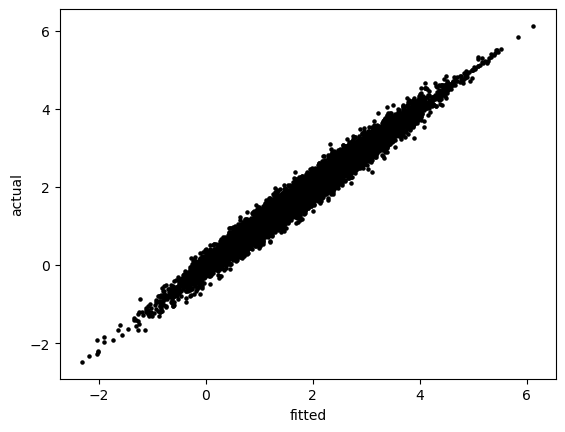

In [109]:
df_test_reg_lc['predict'] = reg_ols_test_lc.predict(df_test_reg_lc['l_test']) + \
reg_kernel_lc.fit([df_all['k'],df_all['inv']])[0]

plt.scatter(x = df_test_reg_lc['predict'], y = df_all['y_error'], s = 5, c = 'black')
plt.xlabel('fitted')
plt.ylabel('actual');

In [97]:
reg_kernel_lc_noerror = KernelReg(endog = df_all['y'], exog = [df_all['k'],df_all['inv']],\
                          var_type = ['c','c'], reg_type = 'lc')
reg_kernel_x_lc_noerror = KernelReg(endog = df_all['l'], exog = [df_all['k'],df_all['inv']],\
                            var_type = ['c','c'], reg_type = 'lc')
df_test_reg_lc_noerror = pd.DataFrame({'y_test': df_all['y'] - reg_kernel_lc_noerror.fit([df_all['k'],df_all['inv']])[0],
                          'l_test': df_all['l'] - reg_kernel_x_lc_noerror.fit([df_all['k'],df_all['inv']])[0]})
reg_ols_test_lc_noerror = smf.ols('y_test ~ -1 + l_test', data=df_test_reg_lc_noerror).fit()
print(f'Bandwidth of y_error is {reg_kernel_lc_noerror.bw}')
print(f'Bandwidth of l_error is {reg_kernel_x_lc_noerror.bw}')
print(reg_ols_test_lc_noerror.summary())

/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in true_divide
  G = G_numer / G_denom
/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in true_divide
  B_x = d_mx / f_x - G * d_fx / f_x
/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in true_divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/Users/curtischen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: divide by zero encountered in true_divide
  B_x = d_mx / f_x - G * d_fx / f_x


Bandwidth of y_error is [0.07348298 0.01436505]
Bandwidth of l_error is [0.02960921 0.00999192]
                                 OLS Regression Results                                
Dep. Variable:                 y_test   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              57.42
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                    3.83e-14
Time:                        14:36:40   Log-Likelihood:                          2249.2
No. Observations:               10000   AIC:                                     -4496.
Df Residuals:                    9999   BIC:                                     -4489.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef   

In my method:

$$(y-E(y|k,inv))=\beta (l-E(l|k,inv)) + \epsilon$$

So

$$y=\beta l +E(y|k,inv)-\beta E(l|k,inv) + \epsilon$$

It means

$$\phi (k,inv)=E(y|k,inv)-\beta E(l|k,inv)$$

In [140]:
y_error_tilde = df_all['y_error'] - reg_ols_test_lc.predict({'l_test': np.array(df_all['l_error'])})
phi_t_1 = reg_kernel_lc.fit([df_all['k'],df_all['inv']])[0] - \
reg_ols_test_lc.predict({'l_test': np.array(reg_kernel_x_lc.fit([df_all['k'],df_all['inv']])[0])})

df_phi = pd.DataFrame({'j':df_all['j'], 't':df_all['t']+1, 'phi_t_1': phi_t_1})
df_all_1st = pd.DataFrame({'j':df_all['j'], 't':df_all['t'], 'y_error_tilde': y_error_tilde})
df_all_1st = pd.merge(df_all_1st, df_phi, how='left', on=['j','t']).sort_values(by=['j','t'], ascending=True)
df_all_1st

,j,t,y_error_tilde,phi_t_1
0,1,1,2.340757,NaN
1000,1,2,1.365392,2.207158
2000,1,3,0.620848,1.490183
3000,1,4,0.447433,0.880219
4000,1,5,0.878144,0.611074
...,...,...,...,...
5999,1000,6,0.526043,0.522391
6999,1000,7,1.379496,0.764186
7999,1000,8,1.695377,1.064690
8999,1000,9,1.678589,1.821040


In [151]:
moment_olleypakes_2nd(alpha = alpha, beta_0 = beta_0, beta_k = beta_k, df_all = df_all, df_all_1st = df_all_1st)

array([-0.01848675, -0.01903803, -0.00382155])

In [167]:
W = np.identity(3)
theta = np.array([alpha, beta_0, beta_k]) 
objective_olleypakes_2nd(theta = theta, df_all = df_all, df_all_1st = df_all_1st,W = W)

0.0007188110073712892

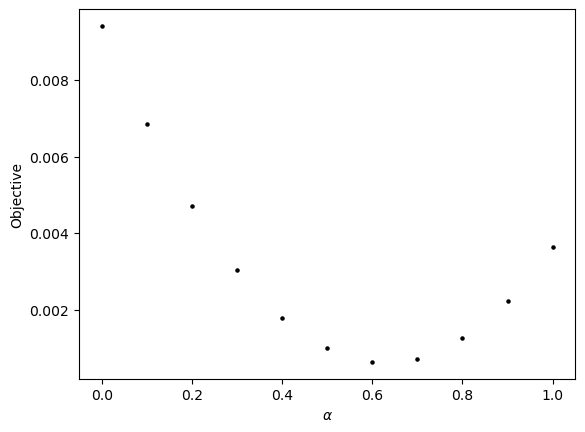

In [180]:
w_result_alpha = []
for alpha_test in np.arange(0, 1.1, 0.1):
    theta_test = [alpha_test, beta_0, beta_k]
    w_result_alpha.append(objective_olleypakes_2nd(theta = theta_test, df_all = df_all, \
                                                   df_all_1st = df_all_1st,W = W))

plt.scatter(x = np.arange(0, 1.1, 0.1), y = w_result_alpha, s = 5, c = 'black')
plt.xlabel('$\\alpha$')
plt.ylabel('Objective');

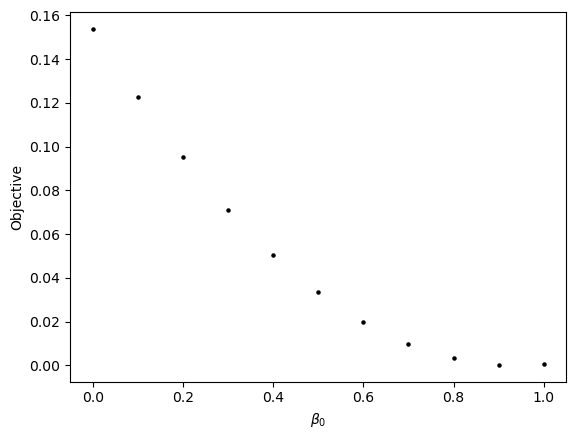

In [182]:
w_result_beta_0 = []
for beta_0_test in np.arange(0, 1.1, 0.1):
    theta_test = [alpha, beta_0_test, beta_k]
    w_result_beta_0.append(objective_olleypakes_2nd(theta = theta_test, df_all = df_all, \
                                                   df_all_1st = df_all_1st,W = W))

plt.scatter(x = np.arange(0, 1.1, 0.1), y = w_result_beta_0, s = 5, c = 'black')
plt.xlabel('$\\beta _0$')
plt.ylabel('Objective');

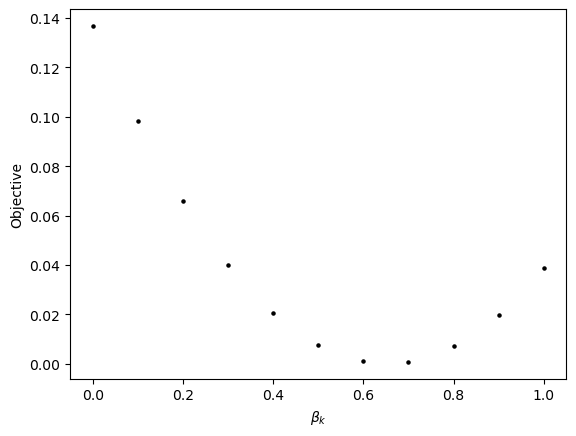

In [184]:
w_result_beta_k = []
for beta_k_test in np.arange(0, 1.1, 0.1):
    theta_test = [alpha, beta_0, beta_k_test]
    w_result_beta_k.append(objective_olleypakes_2nd(theta = theta_test, df_all = df_all, \
                                                   df_all_1st = df_all_1st,W = W))

plt.scatter(x = np.arange(0, 1.1, 0.1), y = w_result_beta_k, s = 5, c = 'black')
plt.xlabel('$\\beta _k$')
plt.ylabel('Objective');

In [185]:
from scipy.optimize import minimize

In [189]:
res = minimize(fun = objective_olleypakes_2nd, x0 = theta, method='L-BFGS-B', 
               args = (df_all, df_all_1st, W))
res

      fun: 2.028265907572463e-07
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.35650301e-07, 5.91285793e-07, 3.78410821e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.70236523, 0.97659347, 0.66937981])